### AirBnB Fair Valuation

#### Welcome to Airbnb Analysis Corp.! Your task is to set the competitive daily accomodation rate for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a fair value that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!

`- The owner has been a host since August 2010
- The location is lon:151.274506, lat:33.889087
- The current review score rating 95.0
- Number of reviews 53
- Minimum nights 4
- The house can accomodate 10 people.
- The owner currently charges a cleaning fee of 370
- The house has 3 bathrooms, 5 bedrooms, 7 beds.
- The house is available for 255 of the next 365 days
- The client is verified, and they are a superhost.
- The cancelation policy is strict with a 14 days grace period.
- The host requires a security deposit of $1,500`

All values strictly apply to the month of July 2018

In [1]:
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondu Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_score_rating"] = 95
dict_client["number_of_review"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] =  10
dict_client["bathrooms"] = 3
dict_client["bedroom"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availabilty_365"] = 255
dict_client["host_identity_verified"] = 1
dict_client["host_is_superhost"] = 1
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

In [2]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd

In [3]:
np.random.seed(42)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [6]:
#where to save the figure
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'end_to_end_project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)

In [7]:
def save_fig(fig_id, tight_layout= True, fig_extension="png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format = fig_extension, dpi= resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format = fig_extension, dpi= resolution)

In [8]:
# ignor useless warning
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')
pd.options.display.max_columns = None

In [9]:
from pathlib import Path

github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv")
if my_file.is_file():
    print("Local file found")
    df = pd.read_csv("datasets/sydney_airbnb.csv")
else:
    print("Be patient: loading from github")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print('Done')

Be patient: loading from github
Done


C:\Users\gayatri\AppData\Local\Temp\ipykernel_8964\4005122902.py:11: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')


In [10]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,As much as they want.,Be considerate. No showering after 2330h.,https://a0.muscache.com/im/pictures/2797669/17...,40855,https://www.airbnb.com/users/show/40855,Colleen,23/09/09,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",within a day,67%,t,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, NSW, Australia",Potts Point,Sydney,NaN,Potts Point,NSW,2011,Sydney,"Potts Point, Australia",AU,Australia,-33.869168,151.226562,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,Kitchen,Elevator,""Buzzer/wireless intercom...",NaN,$65.00,NaN,NaN,NaN,NaN,1,$0.00,2,180,4 weeks ago,t,9,39,69,339,177,5/12/09,1/07/18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,https://a0.muscache.com/im/pictures/763ad5c8-c...,17061,https://www.airbnb.com/users/show/17061,Stuart,14/05/09,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within an hour,100%,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$98.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,yesterday,t,13,30,45,188,468,24/07/10,27/06/18,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully reno

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27070 non-null  int64  
 1   listing_url                       27070 non-null  object 
 2   name                              27056 non-null  object 
 3   summary                           26765 non-null  object 
 4   space                             18808 non-null  object 
 5   description                       27045 non-null  object 
 6   neighborhood_overview             16114 non-null  object 
 7   notes                             11406 non-null  object 
 8   transit                           16863 non-null  object 
 9   access                            16666 non-null  object 
 10  interaction                       15318 non-null  object 
 11  house_rules                       16457 non-null  object 
 12  pict

In [12]:
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee","accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", "host_is_superhost","host_since","cancellation_policy"] 

In [13]:
df = df[incl]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   27070 non-null  object 
 1   city                    27037 non-null  object 
 2   longitude               27070 non-null  float64
 3   latitude                27070 non-null  float64
 4   review_scores_rating    19512 non-null  float64
 5   number_of_reviews       27070 non-null  int64  
 6   minimum_nights          27070 non-null  int64  
 7   security_deposit        16722 non-null  object 
 8   cleaning_fee            19250 non-null  object 
 9   accommodates            27070 non-null  int64  
 10  bathrooms               27048 non-null  float64
 11  bedrooms                27062 non-null  float64
 12  beds                    27037 non-null  float64
 13  property_type           27070 non-null  object 
 14  room_type               27070 non-null

In [15]:
import re
price_list = ["price", "cleaning_fee", "security_deposit"]

for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

In [16]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [17]:
df['price'].head()

0     65.0
1     98.0
2    469.0
3     63.0
4     39.0
Name: price, dtype: float64

<Axes: >

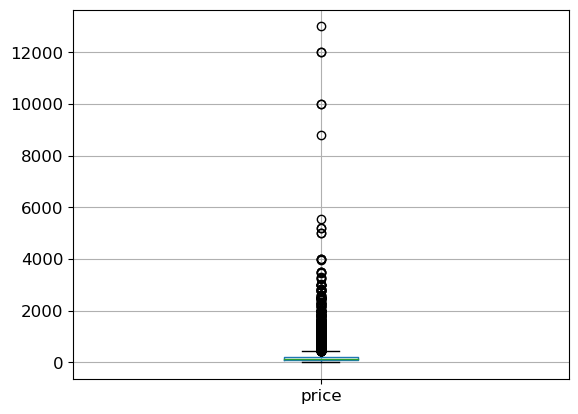

In [18]:
df.boxplot(column='price')

In [19]:
df = df[df['price'] <df['price'].quantile(0.995)].reset_index(drop=True)

In [20]:
df['price'].skew()

2.957872457159033

<Axes: >

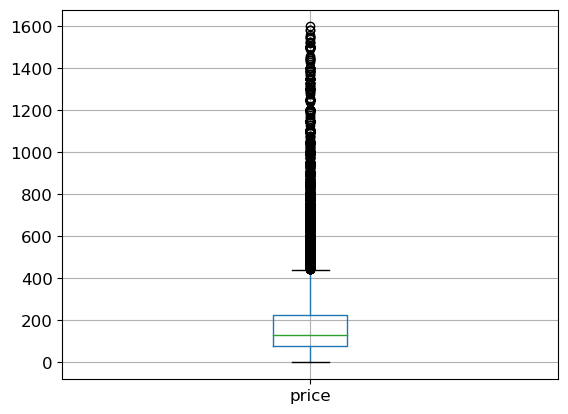

In [21]:
df.boxplot(column='price')

In [22]:
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   26931 non-null  float64       
 1   city                    26899 non-null  object        
 2   longitude               26931 non-null  float64       
 3   latitude                26931 non-null  float64       
 4   review_scores_rating    19465 non-null  float64       
 5   number_of_reviews       26931 non-null  int64         
 6   minimum_nights          26931 non-null  int64         
 7   security_deposit        26931 non-null  float64       
 8   cleaning_fee            26931 non-null  float64       
 9   accommodates            26931 non-null  int64         
 10  bathrooms               26909 non-null  float64       
 11  bedrooms                26923 non-null  float64       
 12  beds                    26898 non-null  float6

In [24]:
df["cancellation_policy"].value_counts()

strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: cancellation_policy, dtype: int64

In [25]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [26]:
%matplotlib inline

Saving figure attribute_histogram_plots


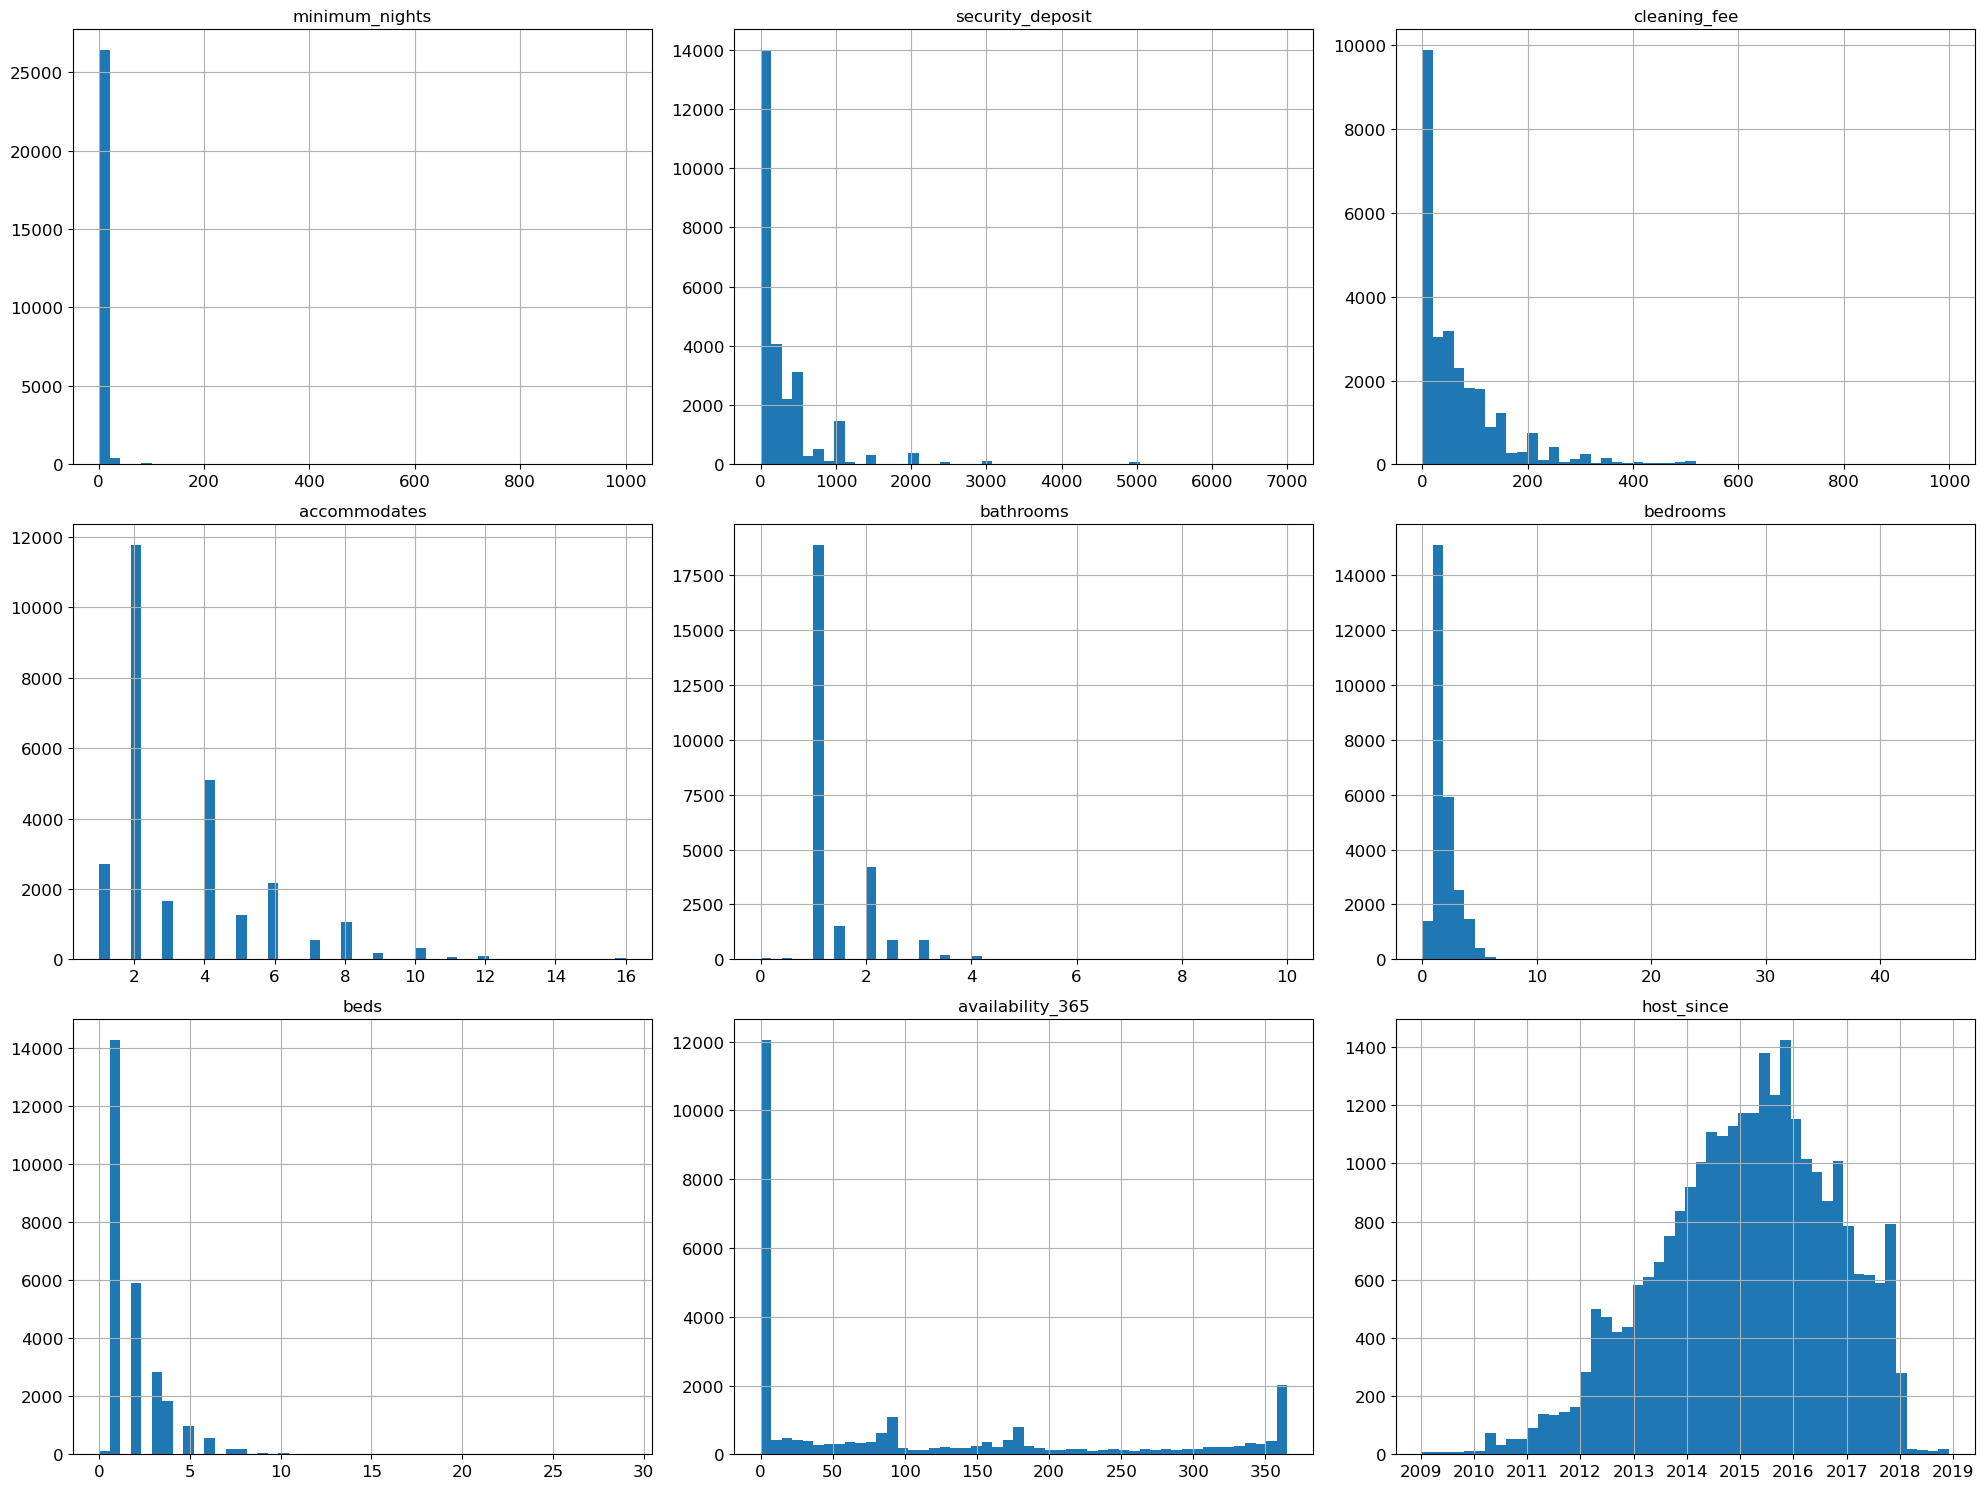

In [27]:
try:
    df.iloc[:, 6:].hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass
    

In [29]:
df['city'].value_counts().head(10)

Bondi Beach     1671
Manly            958
Surry Hills      919
Bondi            785
Randwick         684
Sydney           682
Coogee           675
Darlinghurst     660
North Bondi      629
Newtown          490
Name: city, dtype: int64

In [32]:
list_of_20 = list(df['city'].value_counts().head(10).index)
list_of_20

['Bondi Beach',
 'Manly',
 'Surry Hills',
 'Bondi',
 'Randwick',
 'Sydney',
 'Coogee',
 'Darlinghurst',
 'North Bondi',
 'Newtown']

In [34]:
df = df[df['city'].isin(list_of_20)].reset_index(drop=True)
df

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,3.0,5.0,7.0,House,Entire home/apt,255,t,t,2010-08-14,strict_14_with_grace_period
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,t,f,2010-04-26,strict_14_with_grace_period
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,152,t,f,2010-04-26,strict_14_with_grace_period
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,t,t,2012-01-18,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,156.0,Bondi,151.270708,-33.896784,NaN,0,1,0.0,0.0,6,2.0,3.0,3.0,Apartment,Entire home/apt,0,f,f,2017-11-09,flexible
8149,65.0,Randwick,151.242108,-33.916868,100.0,4,1,0.0,50.0,1,1.0,1.0,1.0,Apartment,Private room,278,f,f,2014-04-04,flexible
8150,50.0,Darlinghurst,151.222579,-33.876381,80.0,1,7,0.0,0.0,1,1.5,5.0,1.0,House,Private room,0,t,f,2013-03-11,flexible
8151,128.0,Surry Hills,151.209611,-33.881581,91.0,21,2,200.0,121.0,4,1.0,1.0,2.0,Apartment,Entire home/apt,77,t,f,2017-02-21,strict_14_with_grace_period


In [36]:
df['property_type'].value_counts()

Apartment             5970
House                 1497
Townhouse              271
Condominium            115
Loft                    59
Guest suite             44
Other                   33
Hostel                  30
Bed and breakfast       25
Guesthouse              24
Serviced apartment      23
Villa                   16
Bungalow                 7
Boutique hotel           6
Cottage                  6
Tent                     6
Tiny house               5
Resort                   5
Hotel                    3
Cabin                    2
Yurt                     1
Camper/RV                1
Chalet                   1
Aparthotel               1
Earth house              1
Houseboat                1
Name: property_type, dtype: int64

In [42]:
item_counts = df.groupby(['property_type']).size()
rare_items = list(item_counts.loc[item_counts<=10].index.values)

In [43]:
rare_items

['Aparthotel',
 'Boutique hotel',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Chalet',
 'Cottage',
 'Earth house',
 'Hotel',
 'Houseboat',
 'Resort',
 'Tent',
 'Tiny house',
 'Yurt']

In [44]:
np.random.seed(42)

In [46]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,3.0,5.0,7.0,House,Entire home/apt,255,t,t,2010-08-14,strict_14_with_grace_period
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,t,f,2010-04-26,strict_14_with_grace_period
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,152,t,f,2010-04-26,strict_14_with_grace_period
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,t,t,2012-01-18,strict_14_with_grace_period


In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ['city']:
    df[col+'_city'] = le.fit_transform(df[col])

In [52]:
df

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_city
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period,3
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,3.0,5.0,7.0,House,Entire home/apt,255,t,t,2010-08-14,strict_14_with_grace_period,1
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,t,f,2010-04-26,strict_14_with_grace_period,0
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,152,t,f,2010-04-26,strict_14_with_grace_period,6
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,t,t,2012-01-18,strict_14_with_grace_period,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,156.0,Bondi,151.270708,-33.896784,NaN,0,1,0.0,0.0,6,2.0,3.0,3.0,Apartment,Entire home/apt,0,f,f,2017-11-09,flexible,0
8149,65.0,Randwick,151.242108,-33.916868,100.0,4,1,0.0,50.0,1,1.0,1.0,1.0,Apartment,Private room,278,f,f,2014-04-04,flexible,7
8150,50.0,Darlinghurst,151.222579,-33.876381,80.0,1,7,0.0,0.0,1,1.5,5.0,1.0,House,Private room,0,t,f,2013-03-11,flexible,3
8151,128.0,Surry Hills,151.209611,-33.881581,91.0,21,2,200.0,121.0,4,1.0,1.0,2.0,Apartment,Entire home/apt,77,t,f,2017-02-21,strict_14_with_grace_period,8


In [53]:
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x:1 if x=='t' else 0)
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x:1 if x=='t' else 0)

In [55]:
df = df.dropna()

In [56]:
df

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_city
0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,1,0,2009-03-12,strict_14_with_grace_period,3
1,700.0,Bondi Beach,151.274506,-33.889087,95.0,53,4,1500.0,370.0,11,3.0,5.0,7.0,House,Entire home/apt,255,1,1,2010-08-14,strict_14_with_grace_period,1
2,190.0,Bondi,151.271029,-33.897393,94.0,12,2,500.0,150.0,4,1.0,2.0,3.0,Apartment,Entire home/apt,233,1,0,2010-04-26,strict_14_with_grace_period,0
3,225.0,North Bondi,151.283553,-33.889633,79.0,16,2,500.0,130.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,152,1,0,2010-04-26,strict_14_with_grace_period,6
4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,1,1,2012-01-18,strict_14_with_grace_period,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147,85.0,Randwick,151.247500,-33.919442,93.0,3,3,0.0,10.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,0,1,0,2016-01-19,flexible,7
8149,65.0,Randwick,151.242108,-33.916868,100.0,4,1,0.0,50.0,1,1.0,1.0,1.0,Apartment,Private room,278,0,0,2014-04-04,flexible,7
8150,50.0,Darlinghurst,151.222579,-33.876381,80.0,1,7,0.0,0.0,1,1.5,5.0,1.0,House,Private room,0,1,0,2013-03-11,flexible,3
8151,128.0,Surry Hills,151.209611,-33.881581,91.0,21,2,200.0,121.0,4,1.0,1.0,2.0,Apartment,Entire home/apt,77,1,0,2017-02-21,strict_14_with_grace_period,8


In [57]:
cat_cols = ['price','city', 'property_type', 'room_type', 'host_since', 'cancellation_policy', ]
x = df.drop(cat_cols, axis=1)
y = df['price']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [62]:
x_train

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,city_city
786,151.261349,-33.896510,100.0,3,14,750.0,250.0,7,3.0,4.0,6.0,36,1,0,0
6053,151.220377,-33.876455,95.0,80,1,199.0,69.0,4,1.0,1.0,2.0,118,0,1,3
3418,151.273212,-33.893427,92.0,24,2,0.0,0.0,2,1.0,1.0,1.0,364,1,0,1
203,151.179763,-33.893178,100.0,8,4,500.0,120.0,5,1.5,3.0,3.0,0,0,0,5
311,151.280749,-33.884404,97.0,14,2,0.0,35.0,2,1.0,1.0,1.0,34,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,151.213896,-33.878780,98.0,12,5,1500.0,40.0,3,1.0,1.0,1.0,2,1,0,8
7034,151.216098,-33.883944,91.0,9,3,400.0,210.0,4,1.0,2.0,3.0,146,0,0,8
7087,151.264848,-33.891864,70.0,2,3,0.0,0.0,2,1.0,1.0,2.0,0,0,0,1
7329,151.270196,-33.895744,100.0,2,5,0.0,0.0,2,1.0,1.0,1.0,0,1,0,0


In [66]:
y_test

7301    192.0
6621     70.0
2913    200.0
4985    150.0
6062    161.0
        ...  
6942    525.0
1928    173.0
3074    150.0
3412    167.0
3574    110.0
Name: price, Length: 1179, dtype: float64

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(x_test)